In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
import missingno as msno

In [3]:
df=pd.read_excel("Data Visualization Assignmnet.xlsx")

In [4]:
# Data Review
df.head() # Top 5 rows 

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore


In [5]:
df.tail() #last 5 rows

,DATE,DESCRIPTION,UNIT,PLACE
106,2022-07-05,Lemon,4.0,NaN
107,2022-07-08,Beef,1.0,NaN
108,2022-07-15,Beef,1.0,NaN
109,2022-07-15,Prawns,1.0,NaN
110,2022-07-15,Lemon,1.0,NaN


In [6]:
df.shape # tells the number of rows and columns 

(111, 4)

In [7]:
#information about the DataFrame.
df.info() #The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    float64       
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ KB


In [8]:
#column labels
df.columns

Index(['DATE', 'DESCRIPTION', 'UNIT', 'PLACE'], dtype='object')

In [9]:
#Return the memory usage of each column in bytes.
df.memory_usage()

Index          128
DATE           888
DESCRIPTION    888
UNIT           888
PLACE          888
dtype: int64

In [10]:
# Categerical columns
Cat_col=[fea for fea in df.columns if df[fea].dtype=='O']
Cat_col

['DESCRIPTION', 'PLACE']

In [11]:
# Numerical columns
Num_col=[fea for fea in df.columns if df[fea].dtype=='float']
Num_col

['UNIT']

In [12]:
Date_col=[fea for fea in df.columns if df[fea].dtype=='datetime64[ns]']
Date_col

['DATE']

In [13]:
# description of the data in the DataFrame
df.describe()

,UNIT
count,111.000000
mean,1.720721
std,1.088545
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [14]:
#counting for each column how many null values there are
df.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

**There are 8 null values in place column**

In [15]:
df.isnull().sum().sum()

8

<AxesSubplot:>

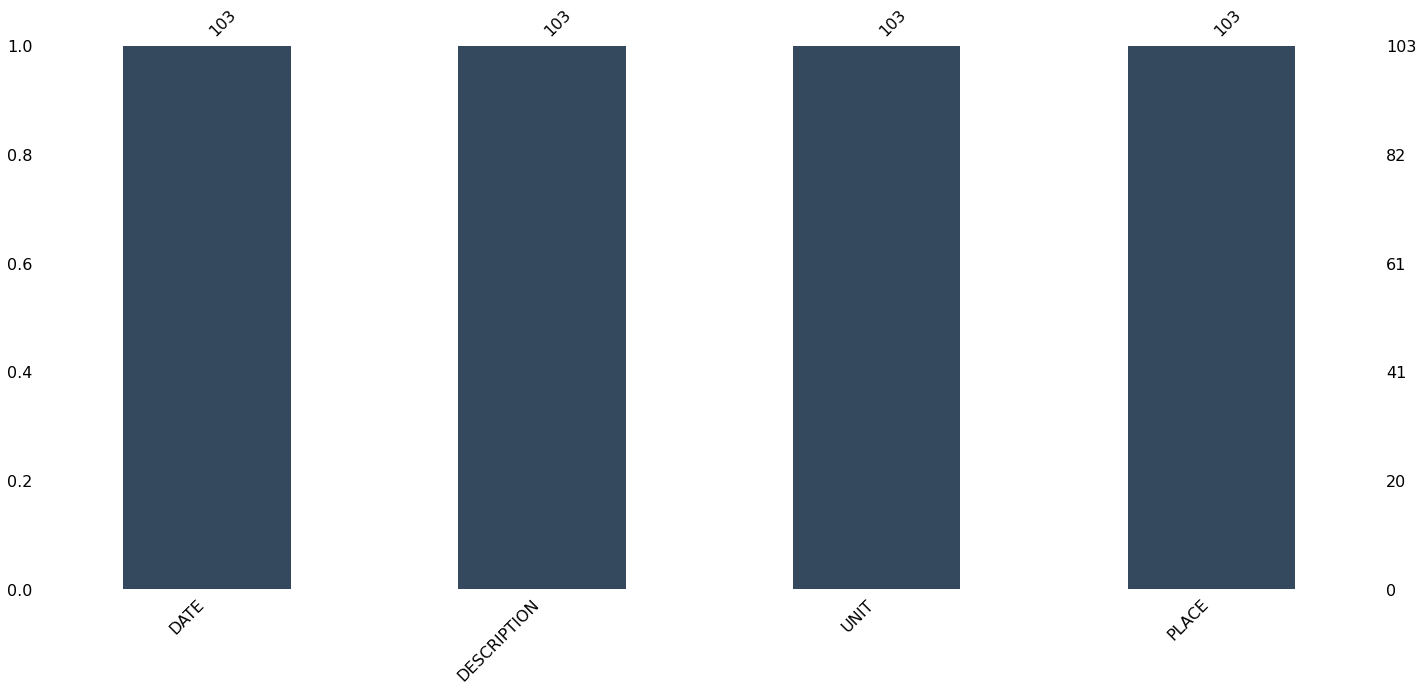

In [76]:
msno.bar(df,color='#34495E') # Only PLACE has missing values

In [49]:
df1=df.dropna() # drop null values rows

In [50]:
# Clean data set 
# Always  use clean data 
df1 

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore
...,...,...,...,...
98,2022-06-26,Prawns,1.0,Kochi
99,2022-06-28,Prawns,4.0,Kottayam
100,2022-06-28,Fish,3.0,Kottayam
101,2022-06-28,King Fish,1.0,Kottayam


In [52]:
# Return Unique Values
df1.nunique()

DATE           33
DESCRIPTION    10
UNIT            6
PLACE          33
dtype: int64

(array([ 3.,  1.,  8.,  3.,  1.,  2.,  0., 11., 13.,  0.,  0.,  0.,  0.,
         5.,  4.,  0.,  1.,  5.,  6., 10.,  1.,  0.,  1.,  3.,  7.,  0.,
         2.,  0.,  2.,  0.,  0.,  1.,  0.,  8.,  0.,  5.]),
 array([19083.        , 19085.44444444, 19087.88888889, 19090.33333333,
        19092.77777778, 19095.22222222, 19097.66666667, 19100.11111111,
        19102.55555556, 19105.        , 19107.44444444, 19109.88888889,
        19112.33333333, 19114.77777778, 19117.22222222, 19119.66666667,
        19122.11111111, 19124.55555556, 19127.        , 19129.44444444,
        19131.88888889, 19134.33333333, 19136.77777778, 19139.22222222,
        19141.66666667, 19144.11111111, 19146.55555556, 19149.        ,
        19151.44444444, 19153.88888889, 19156.33333333, 19158.77777778,
        19161.22222222, 19163.66666667, 19166.11111111, 19168.55555556,
        19171.        ]),
 <BarContainer object of 36 artists>)

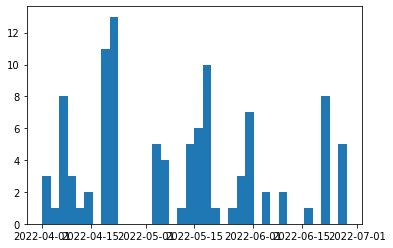

In [51]:
#Histogram for univariate variable
plt.hist(df1['DATE'], bins=36) #The histogram tells us that people having DESCRIPTION majorly on date between 2022-04-15 to 202205-02

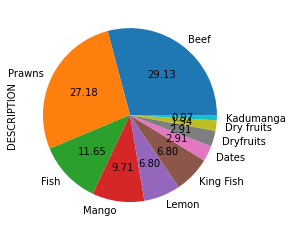

In [61]:
# Pie chart
df1['DESCRIPTION'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

**A vast majority of the DESCRIPTION is “Beef” in this dataset**

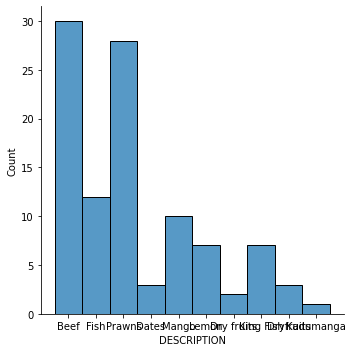

In [62]:
#distribution plot
sns.displot(df1, x="DESCRIPTION") # Beef is more demanding

In [63]:
# counting DESCRIPTION
count=df1['DESCRIPTION'].value_counts()

In [64]:
count

Beef          30
Prawns        28
Fish          12
Mango         10
Lemon          7
King Fish      7
Dates          3
Dryfruits      3
Dry fruits     2
Kadumanga      1
Name: DESCRIPTION, dtype: int64

<AxesSubplot:xlabel='count', ylabel='DESCRIPTION'>

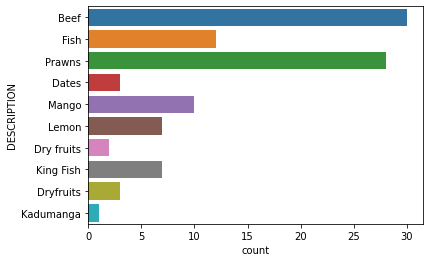

In [65]:
#count plot for DESCRIPTION :Which DESCRIPTION  is in demanding
sns.countplot(data=df1, y="DESCRIPTION")

In [69]:
# Statistical Analysis
df1['UNIT'].describe()

count    103.000000
mean       1.718447
std        1.097390
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: UNIT, dtype: float64

(array([59., 28.,  7.,  6.,  1.,  2.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

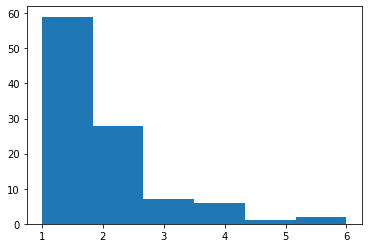

In [70]:
#histogram for UNIT variable
plt.hist(df1['UNIT'], bins=6) # Mostly take 1 unit

In [71]:
# Counting majority PLACE
count=df1['PLACE'].value_counts()
x=count.head(10)

In [59]:
x

Malappuram         10
Noida - UP          6
Eloor               6
Kottayam            6
Mumbai              6
United States       5
Kochi               5
To Kottayam         5
Eroor - Vytila      5
Pathanamthitta      4
Name: PLACE, dtype: int64

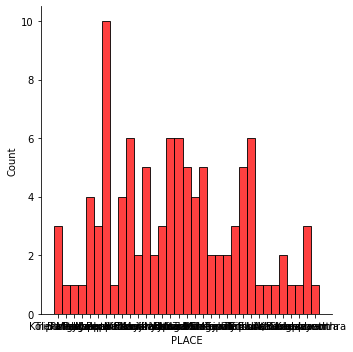

In [68]:
#distribution plot for PLACE variable
sns.displot(df1, x="PLACE",color='Red') # Malappuram city takes most of the DESCRIPTION

**Covariance**

In [72]:
df1.cov() # covariance

,UNIT
UNIT,1.204264


In [73]:
corelation=df1.corr() # correlation return relation between variables
corelation          # There is no relation between other variables, they are independent variables

,UNIT
UNIT,1.0


<AxesSubplot:>

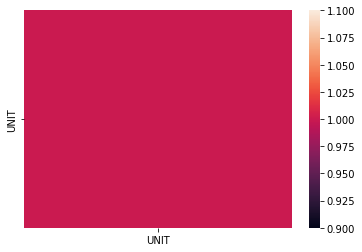

In [28]:
sns.heatmap(corelation) # there is only positive correlation between UNIT Variable

**Missing values**

<AxesSubplot:>

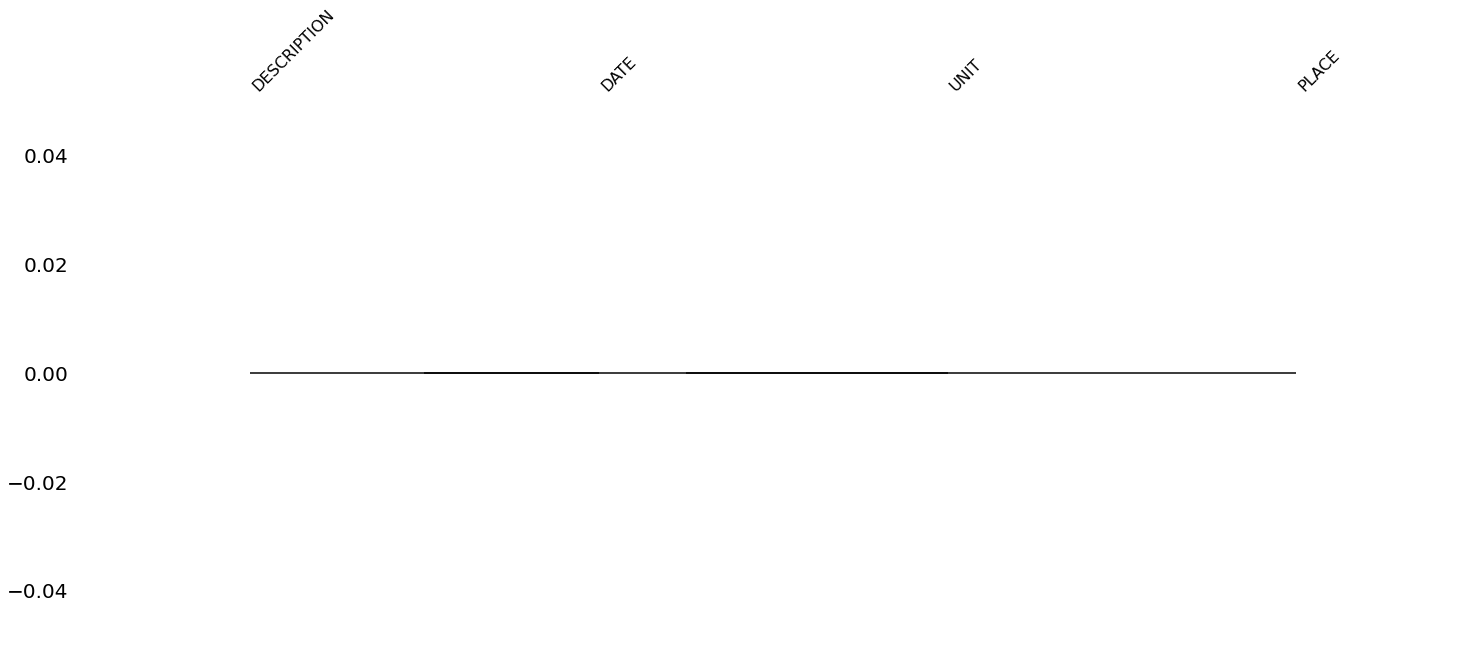

In [77]:
#The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.
msno.dendrogram(df1) # In clean data set has no missing values

In [78]:
#Duplicate values
df1.value_counts().head()

DATE        DESCRIPTION  UNIT  PLACE            
2022-04-22  King Fish    2.0   Mumbai               2
2022-05-07  Mango        1.0   Bangalore to US      2
2022-05-19  Beef         1.0   Mangalore - Ullal    2
2022-04-22  Beef         2.0   Mumbai               2
2022-05-19  Beef         1.0   Nettoor              1
dtype: int64

<AxesSubplot:xlabel='DATE'>

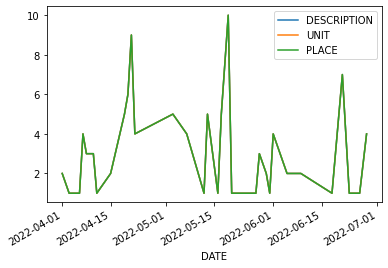

In [79]:
# grouping with date column plot count plot
df1.groupby('DATE').count().plot()